                                        DEMAND FORECASTING FOR RETAIL INVENTORY MANAGEMENT 

1. IMPORTING LIBRARIES

In [41]:
# Importing Core Libraries
import numpy as np
import pandas as pd


In [42]:
# Importing Metrics and Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [43]:
# Importing Visualisation and Deployment
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


2. LOAD THE DATASET

In [44]:
# Load the Dataset
Data_Frame = pd.read_csv("Retail_Store_Inventory_ClassicalML.csv")


In [45]:
# Display the first five rows
Data_Frame.head()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [46]:
# Checking the Data Types and Missing Values
Data_Frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [47]:
# Basic Statistics about the DataFrame
Data_Frame.describe()


,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


3. DATA PREPROCESSING

In [48]:
# Getting the dimensions of the Data Frame
print("Shape of the DataSet : ", Data_Frame.shape)


Shape of the DataSet :  (73100, 15)


In [49]:
# Dropping Unnecessary Columns
Data_Frame = Data_Frame.drop(columns=['Date', 'Store ID', 'Product ID'])


In [50]:
# Checking for Missing Values
print(Data_Frame.isnull().sum())


Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [51]:
# Checking for Duplicate Rows
print("Duplicate Rows: ", Data_Frame.duplicated().sum())


Duplicate Rows:  0


In [52]:
# Getting the dimensions of the Data Frame
print("Shape of the DataSet: ", Data_Frame.shape)


Shape of the DataSet:  (73100, 12)


4. DATA VISUALISATION

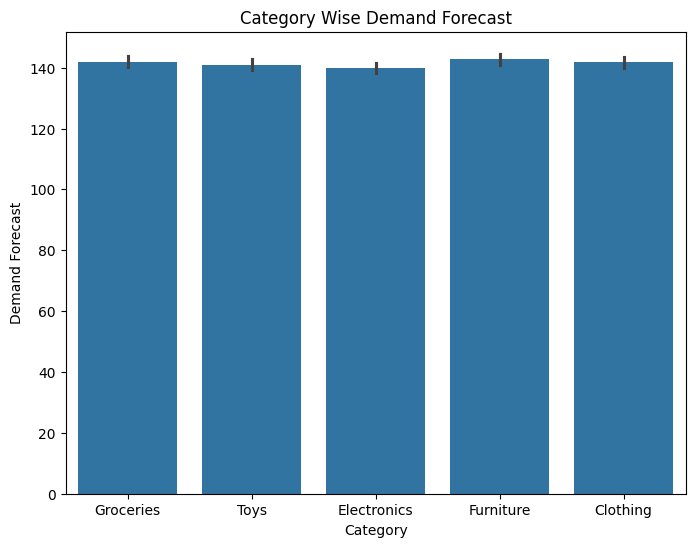

In [53]:
# Category Wise Demand Forecast Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Demand Forecast', data=Data_Frame)
plt.title('Category Wise Demand Forecast')
plt.xlabel('Category')
plt.ylabel('Demand Forecast')
plt.show()


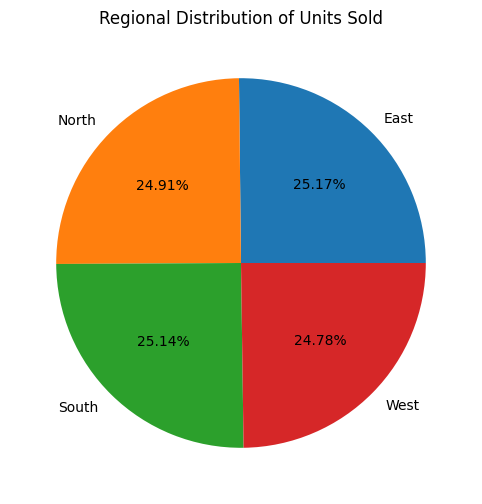

In [54]:
# Regional Analysis of Units Solid
regional_sales = Data_Frame.groupby('Region')['Units Sold'].sum()

plt.figure(figsize=(8, 6))
plt.pie(regional_sales, labels=regional_sales.index, autopct='%1.2f%%')
plt.title('Regional Distribution of Units Sold')
plt.ylabel('')
plt.show()


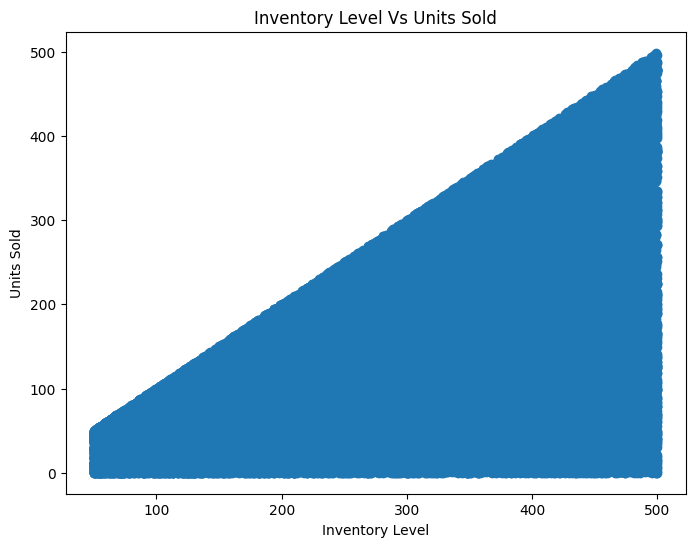

In [55]:
# Inventory Level vs Unit Gold
plt.figure(figsize=(8, 6))
plt.scatter(Data_Frame['Inventory Level'], Data_Frame['Units Sold'])
plt.title('Inventory Level Vs Units Sold')
plt.xlabel('Inventory Level')
plt.ylabel('Units Sold')
plt.show()


C:\Users\mahes\AppData\Local\Temp\ipykernel_20096\3231531500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather Condition', y='Demand Forecast', data=Data_Frame, palette='coolwarm')


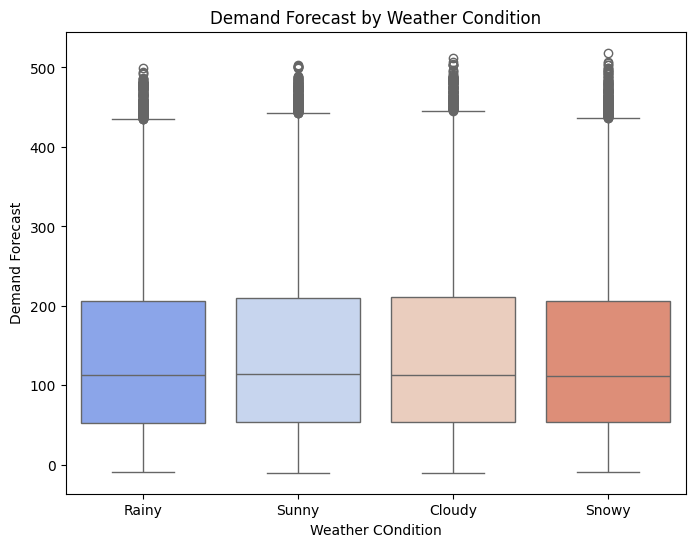

In [56]:
# Demand Forecast by Weather Condition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Weather Condition', y='Demand Forecast', data=Data_Frame, palette='coolwarm')
plt.title('Demand Forecast by Weather Condition')
plt.xlabel('Weather COndition')
plt.ylabel('Demand Forecast')
plt.show()


Seasonality
Autumn    142.803401
Spring    140.814250
Summer    140.470029
Winter    141.900097
Name: Demand Forecast, dtype: float64


C:\Users\mahes\AppData\Local\Temp\ipykernel_20096\1906126637.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seasonality', y='Demand Forecast', data=Data_Frame, palette="viridis")


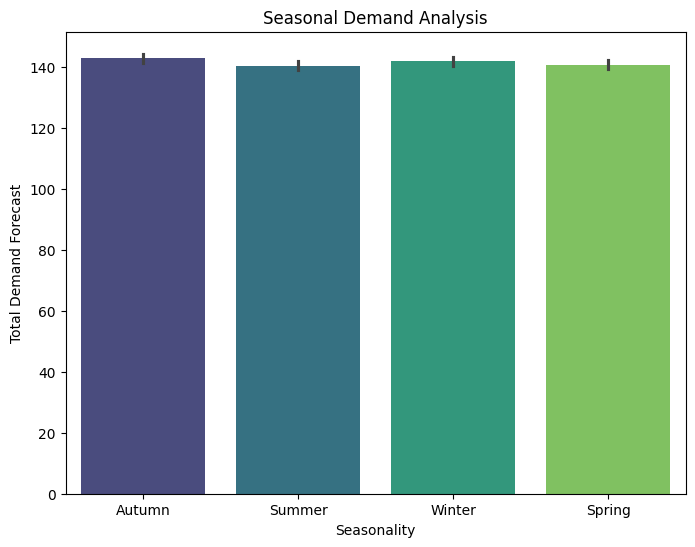

In [57]:
# Seasonal Demand Analysis
print(Data_Frame.groupby('Seasonality')['Demand Forecast'].mean())

plt.figure(figsize=(8, 6))
sns.barplot(x='Seasonality', y='Demand Forecast', data=Data_Frame, palette="viridis")
plt.title('Seasonal Demand Analysis')
plt.ylabel('Total Demand Forecast')
plt.show()

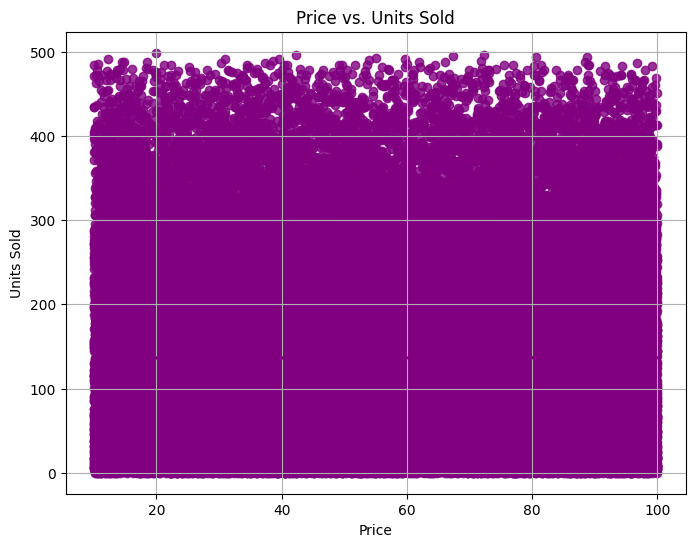

In [58]:
# Price Vs Units Sold
plt.figure(figsize=(8, 6))
sns.regplot(x='Price', y='Units Sold', data=Data_Frame, color='purple')
plt.title('Price vs. Units Sold')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.grid()
plt.show()


5. ENCODING, SPLITTING

In [59]:
# Encode Categorical Features
label_encoders = {}
categorical_columns = ['Category', 'Region', 'Weather Condition', 'Seasonality']


In [60]:
# Encoding using Label Encoder
for col in categorical_columns:
    le = LabelEncoder()
    Data_Frame[col] = le.fit_transform(Data_Frame[col])
    label_encoders[col] = le


In [61]:
# Seperate Features and Target
X = Data_Frame.drop(columns=['Demand Forecast'])
Y = Data_Frame['Demand Forecast']


In [62]:
# Getting the Dimensions of the X and Y
print("X shape : ", X.shape)
print("Y shape : ", Y.shape)


X shape :  (73100, 11)
Y shape :  (73100,)


In [63]:
# Displaying the X and Y
print(X)
print(Y)


       Category  Region  Inventory Level  Units Sold  Units Ordered  Price  \
0             3       1              231         127             55  33.50   
1             4       2              204         150             66  63.01   
2             4       3              102          65             51  27.99   
3             4       1              469          61            164  32.72   
4             1       0              166          14            135  73.64   
...         ...     ...              ...         ...            ...    ...   
73095         2       0               96           8            127  73.73   
73096         4       1              313          51            101  82.57   
73097         0       3              278          36            151  11.11   
73098         4       0              374         264             21  53.14   
73099         3       0              117           6            165  78.39   

       Discount  Weather Condition  Holiday/Promotion  Competit

6. TRAIN_TEST_SPLIT AND SCALING

In [64]:
# Train Test Split 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [65]:
# Checking the shapes of above
print("X_Train shape : ", X_Train.shape)
print("Y_Train shape : ", Y_Train.shape)
print("X_Test shape  : ", X_Test.shape)
print("Y_Test shape  : ", Y_Test.shape)


X_Train shape :  (51170, 11)
Y_Train shape :  (51170,)
X_Test shape  :  (21930, 11)
Y_Test shape  :  (21930,)


In [66]:
# Scaling the Features
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test  = scaler.transform(X_Test)


7. MODEL TRAINING AND EVALUATION AND HYPERPARAMETER TUNING

7.1 LINEAR REGRESSION

In [67]:
# Initialise the Linear Regression Model
linear_model = LinearRegression()


In [68]:
# Train the Linear Regression Model
linear_model.fit(X_Train, Y_Train)


LinearRegression()

In [69]:
# Predicting on Test Data Set
Y_Pred_linear = linear_model.predict(X_Test)


In [70]:
# Evaluate the Model
mse_linear = mean_squared_error(Y_Test, Y_Pred_linear)
mae_linear = mean_absolute_error(Y_Test, Y_Pred_linear)
r2_linear  = r2_score(Y_Test, Y_Pred_linear)


In [71]:
# Printing the Metrics of LInear Regression Model
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_linear}")
print(f"Mean Absolute Error: {mae_linear}")
print(f"R2 Score: {r2_linear}")

Linear Regression Results:
Mean Squared Error: 74.64586063719511
Mean Absolute Error: 7.464730979739077
R2 Score: 0.9937560523610941


In [72]:
# Hyperparamter Tuning
# Defining Hyperparameters
param_grid_linear = {
    'fit_intercept': [True, False]
}

# Initialising GridSearchCV
GridSearchCV_linear = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid_linear, scoring='r2', cv= 5)

# Perform HyperParameter Tuning
GridSearchCV_linear.fit(X_Train, Y_Train)

# Using the Best Model
Best_Linear_Model = GridSearchCV_linear.best_estimator_

In [73]:
# Best parameters and score
print("Best parameters for Linear Regression:", GridSearchCV_linear.best_params_)
print("Best R2 score for Linear Regression:", GridSearchCV_linear.best_score_)


Best parameters for Linear Regression: {'fit_intercept': True}
Best R2 score for Linear Regression: 0.9936946958741986


7.2 RANDOM FOREST REGRESSOR

In [74]:
# Initialize Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)


In [75]:
# Train the Random Forest Model
random_forest_model.fit(X_Train, Y_Train)


RandomForestRegressor(random_state=42)

In [76]:
# Predict on Test Data
Y_Pred_RF = random_forest_model.predict(X_Test)


In [77]:
# Evaluating the Random Forest Model
mse_RF = mean_squared_error(Y_Test, Y_Pred_RF)
mae_RF = mean_absolute_error(Y_Test, Y_Pred_RF)
r2_RF = r2_score(Y_Test, Y_Pred_RF)


In [78]:
# Displaying the Results of Random Forest Model
print("Random Forest Results:")
print(f"Mean Squared Error: {mse_RF}")
print(f"Mean Absolute Error: {mae_RF}")
print(f"R2 Score: {r2_RF}")


Random Forest Results:
Mean Squared Error: 79.14648517698451
Mean Absolute Error: 7.599020159598723
R2 Score: 0.9933795858868792


In [79]:
# HyperParamter Tuning for Random Forest Regression
# Defining Parameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'bootstrap': [True, False]
}

# Initialise the RandomisedSearchCV
GridSearchCV_RF = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                      param_distributions=param_grid_rf,
                                      n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)

# Perform HyperParameter Tuning
GridSearchCV_RF.fit(X_Train, Y_Train)

# Use the Best Model
Best_Random_Forest_Model = GridSearchCV_RF.best_estimator_

In [80]:
# Best parameters and score
print("Best parameters for Random Forest:", GridSearchCV_RF.best_params_)
print("Best R2 score for Random Forest:", GridSearchCV_RF.best_score_)


Best parameters for Random Forest: {'n_estimators': 200, 'max_depth': 10, 'bootstrap': True}
Best R2 score for Random Forest: 0.9935595442127978


8. EVALUATING THE TUNING MDELS

In [81]:
# Predict using the tuned models
y_pred_linear_tuned = Best_Linear_Model.predict(X_Test)
y_pred_rf_tuned = Best_Random_Forest_Model.predict(X_Test)

# Evaluate Linear Regression
print("Tuned Linear Regression:")
print(f"Mean Squared Error: {mean_squared_error(Y_Test, y_pred_linear_tuned):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_Test, y_pred_linear_tuned):.2f}")
print(f"R2 Score: {r2_score(Y_Test, y_pred_linear_tuned):.2f}")

# Evaluate Random Forest
print("Tuned Random Forest:")
print(f"Mean Squared Error: {mean_squared_error(Y_Test, y_pred_rf_tuned):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_Test, y_pred_rf_tuned):.2f}")
print(f"R2 Score: {r2_score(Y_Test, y_pred_rf_tuned):.2f}")


Tuned Linear Regression:
Mean Squared Error: 74.65
Mean Absolute Error: 7.46
R2 Score: 0.99
Tuned Random Forest:
Mean Squared Error: 75.81
Mean Absolute Error: 7.50
R2 Score: 0.99


9. SAVE THE MODELS

In [82]:
# Save the tuned models
joblib.dump(Best_Linear_Model, "Best_Linear_Model.pkl")
joblib.dump(Best_Random_Forest_Model, "Best_Random_Forest_Model.pkl")


['Best_Random_Forest_Model.pkl']

10. LOAD THE MODELS

In [83]:
# Load the Models
loaded_Linear_Model = joblib.load("Best_Linear_Model.pkl")
loaded_RF_Model = joblib.load("Best_Random_Forest_Model.pkl")


11. PREDICTION FOR NEW DATA

In [84]:
# Example new data
new_data = pd.DataFrame({
    'Category': [1],
    'Region': [2],
    'Inventory Level': [300],
    'Units Sold': [150],
    'Units Ordered': [120],
    'Price': [50],
    'Discount': [10],
    'Weather Condition': [1],
    'Holiday/Promotion': [0],
    'Competitor Pricing': [48],
    'Seasonality': [2]
})

# Preprocess new data
new_data_scaled = scaler.transform(new_data)

# Predict using both models
predicted_linear = loaded_Linear_Model.predict(new_data_scaled)
predicted_rf = loaded_RF_Model.predict(new_data_scaled)

print(f"Predicted Demand (Linear Regression): {predicted_linear[0]:.2f}")
print(f"Predicted Demand (Random Forest): {predicted_rf[0]:.2f}")


Predicted Demand (Linear Regression): 155.07
Predicted Demand (Random Forest): 153.93
